In [1]:
import scipy.stats as stats
import seaborn as sns
import numpy as np
from scipy.stats import rv_discrete
import matplotlib.pyplot as plt

from src.code.models.galton_watson import GaltonWatson, galton_watson

# Simulation Galton-Watson

## Loi de Poisson

### λ = 1

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Poisson}}(1)$.

In [2]:
poisson_1 = stats.poisson(1)

In [3]:
poisson_1.mean()

1.0

In [4]:
gp1 = GaltonWatson(poisson_1)
gp1

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [5]:
nb_survivants = gp1.simule(20)

In [6]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 0 survivants au bout de 7 époques.


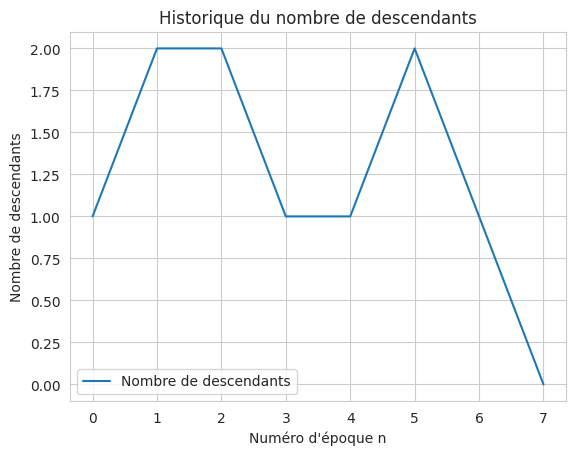

In [7]:
gp1.plot_historique_descendants()

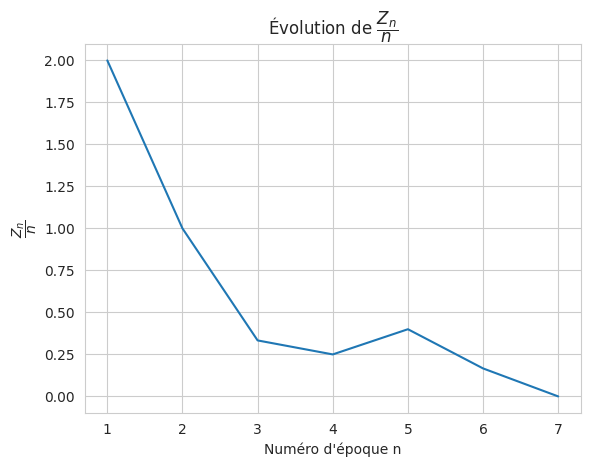

In [8]:
gp1.plot_zn_sur_n()

(array([2., 2., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

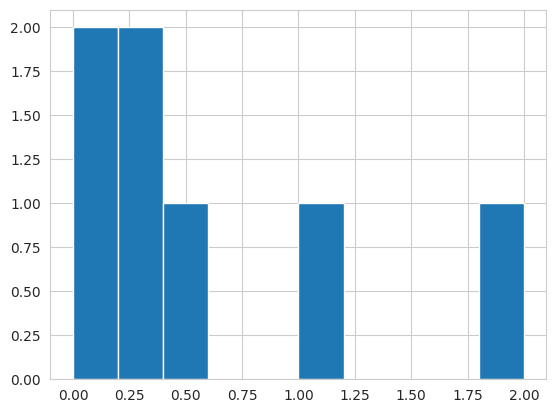

In [9]:
plt.hist(gp1.get_zn_sur_n())

### λ = 2

In [10]:
poisson_2 = stats.poisson(2)

In [11]:
gp2 = GaltonWatson(poisson_2)
gp2

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 2.0
- époque n = 0
- nombre de survivants Z_n = 1

In [12]:
nb_survivants = gp2.simule(20)

In [13]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 1063528 survivants au bout de 7 époques.


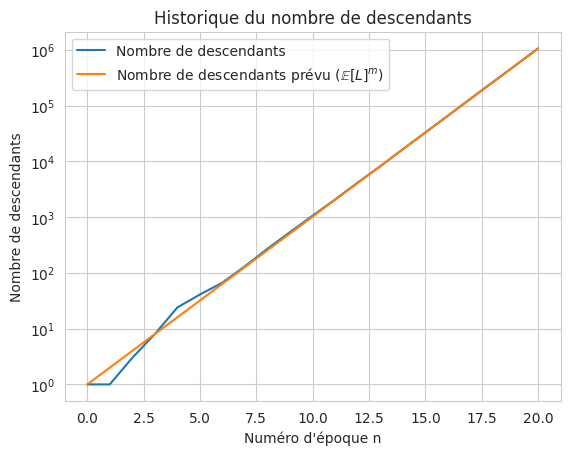

In [14]:
gp2.plot_historique_descendants(logscale=True, affiche_moyenne=True)

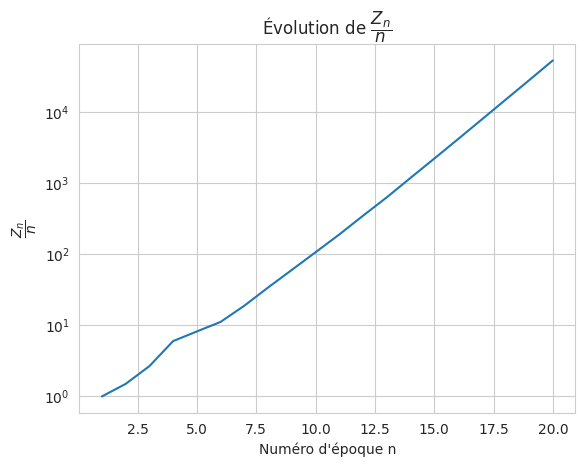

In [15]:
gp2.plot_zn_sur_n(logscale=True)

(array([16.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.000000e+00, 5.318540e+03, 1.063608e+04, 1.595362e+04,
        2.127116e+04, 2.658870e+04, 3.190624e+04, 3.722378e+04,
        4.254132e+04, 4.785886e+04, 5.317640e+04]),
 <BarContainer object of 10 artists>)

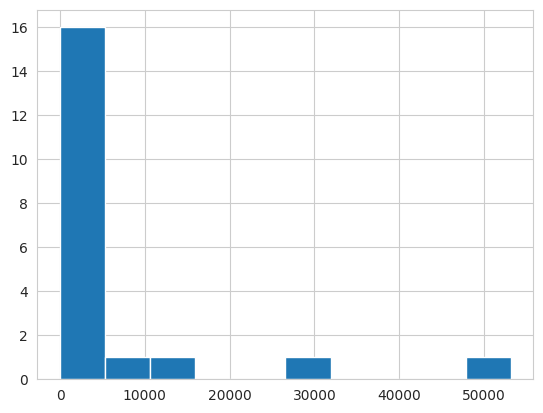

In [16]:
plt.hist(gp2.get_zn_sur_n())

## Essais $Z_n / n$

In [102]:
simu = []

nb_simulations = 10_000
nb_epoques = 100

for i in range(nb_simulations):
    gp1.reset()
    resultat = gp1.simule(nb_epoques)
    simu.append(resultat)
    

In [103]:
simu_poisson1 = np.array(simu)

(array([9.9888e+04, 5.6000e+01, 2.3000e+01, 1.6000e+01, 9.0000e+00,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0. ,  309.5,  619. ,  928.5, 1238. , 1547.5, 1857. , 2166.5,
        2476. , 2785.5, 3095. ]),
 <BarContainer object of 10 artists>)

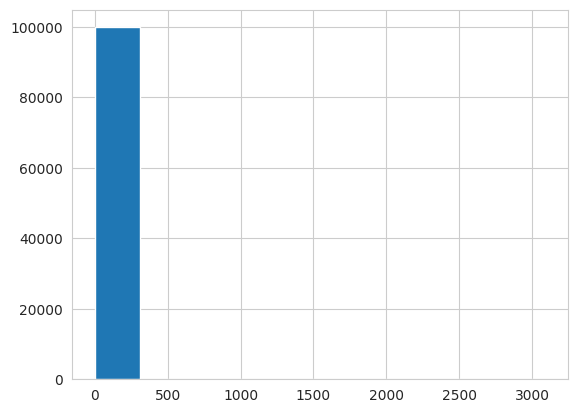

In [104]:
plt.hist(simu_poisson1)

In [105]:
np.sum(simu_poisson1 > 0)

202

In [106]:
simu_poisson1[simu_poisson1 > 0]

array([ 530,  866,  476,  630, 1905, 1054,  159,  434,  635,   57,  236,
       1338,  406,  284,  381,  313,   56, 1827, 1838,   80,  343, 1223,
       2692,  263,  803,  305,  120,  110, 1227,  324,  271,   96,  188,
        528,  157,  628,  365,  546,  155,   57,  235,  151,  714,  207,
        130,  133,  150,  620,  491,  287, 1427,  146,  994,  308,  412,
        348,  316,  356,   36,  139,  126,  917,  421,  830,  456,  797,
        498,  141,  177,  276,  712, 1243,  488,  128, 1123,  583,  165,
        373,  330,   50,  277, 1161,  480,  459,  962,  786,   94,  139,
        140,  449,  483,  480, 1039,  756,    1,  724,  251,  109,   93,
       1103, 1263, 1445,  114,  494, 1106,  110,   91,  573,   64, 1230,
        184,  252,  193,  690,  231,  443,  139,   37,  560,  583,  393,
        409,   20,  466,  431,  115,  103,  277, 1434,  364,   64,  763,
        792,  266,  237,  530,  530,  525, 1004,  156,  610,  188,    5,
         51,   32,   55, 1362,  299,  633,  974,  1

In [107]:
zn_sup_zero = simu_poisson1[simu_poisson1 > 0]

(array([90., 57., 22., 16.,  9.,  2.,  3.,  1.,  1.,  1.]),
 array([1.0000e+00, 3.1040e+02, 6.1980e+02, 9.2920e+02, 1.2386e+03,
        1.5480e+03, 1.8574e+03, 2.1668e+03, 2.4762e+03, 2.7856e+03,
        3.0950e+03]),
 <BarContainer object of 10 artists>)

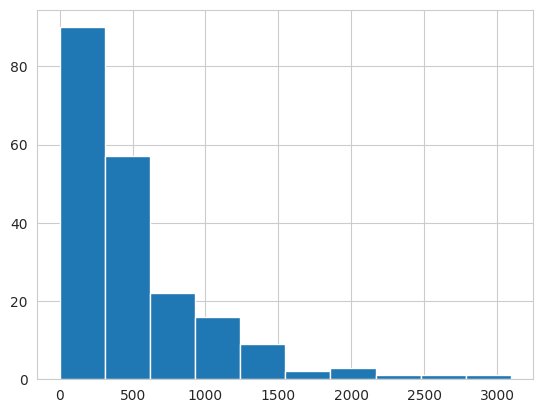

In [108]:
plt.hist(zn_sup_zero)

In [109]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 1.9468190711167226


In [110]:
# lambda_estime = 1

In [111]:
loi_expo1 = stats.expon(scale = 1 / lambda_estime)

In [112]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

(array([95., 50., 24., 13., 10.,  9.,  0.,  0.,  0.,  1.]),
 array([4.30894847e-04, 3.01906678e-01, 6.03382460e-01, 9.04858243e-01,
        1.20633403e+00, 1.50780981e+00, 1.80928559e+00, 2.11076137e+00,
        2.41223716e+00, 2.71371294e+00, 3.01518872e+00]),
 <BarContainer object of 10 artists>)

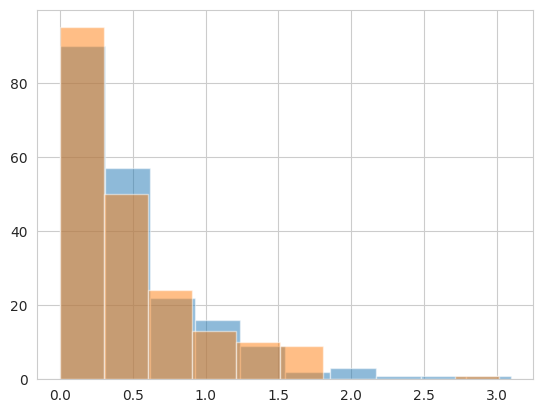

In [113]:
plt.hist(zn_sup_zero / nb_epoques, alpha=0.5)
plt.hist(echantillon_expo, alpha=0.5)

<Axes: ylabel='Probability'>

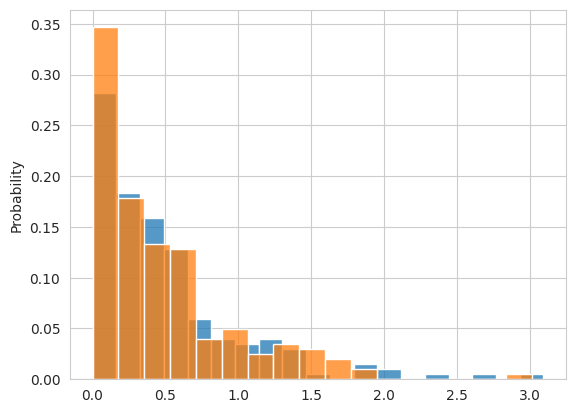

In [114]:
sns.histplot(zn_sup_zero / nb_epoques, stat="probability")
sns.histplot(echantillon_expo, stat="probability")

In [115]:
import numpy as np
from scipy.stats import expon, kstest

# Exemple de données
donnees = zn_sup_zero / nb_epoques

# Paramètre lambda estimé (par exemple, à partir de la méthode du maximum de vraisemblance)
lambda_estime = 1.0 / np.mean(donnees)
print(f"{lambda_estime = }")

# Effectuer le test de Kolmogorov-Smirnov
statistique_ks, p_value = kstest(donnees, 'expon', args=(0, 1/lambda_estime))

# Afficher les résultats
print("Statistique KS:", statistique_ks)
print("P-value:", p_value)

# Interprétation du résultat
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Les données ne suivent pas une loi exponentielle.")
else:
    print("Les données suivent une loi exponentielle.")


lambda_estime = 1.9468190711167226
Statistique KS: 0.043542816866810025
P-value: 0.8220961119584229
Les données suivent une loi exponentielle.


In [27]:
import numpy as np
from scipy.stats import expon
from scipy.optimize import minimize

# Exemple de liste de valeurs
donnees = simu_poisson1[simu_poisson1 > 0]

# Fonction de négation de la log-vraisemblance pour la distribution exponentielle
def neg_log_likelihood(lambda_, data):
    return -np.sum(expon.logpdf(data, scale=1/lambda_))

# Estimation du paramètre lambda avec la méthode du maximum de vraisemblance
resultat_estimation = minimize(neg_log_likelihood, 1, args=(donnees,), method='L-BFGS-B')

# Récupération du paramètre lambda estimé
lambda_estime = 1 / resultat_estimation.x[0]

print("La valeur estimée de lambda est:", lambda_estime)


La valeur estimée de lambda est: 1.0


/tmp/ipykernel_27371/394255457.py:10: RuntimeWarning: divide by zero encountered in divide
  return -np.sum(expon.logpdf(data, scale=1/lambda_))


## Galton-Watson fonctionnel

In [30]:
nb_simulations = 10_000
nb_epoques = 100

simu_poisson_1 = [galton_watson(poisson_1, nb_epoques) for _ in range(nb_simulations)]

In [31]:
a = np.array(simu_poisson_1)

(array([9.891e+03, 5.900e+01, 2.300e+01, 1.900e+01, 5.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  33.1,  66.2,  99.3, 132.4, 165.5, 198.6, 231.7, 264.8,
        297.9, 331. ]),
 <BarContainer object of 10 artists>)

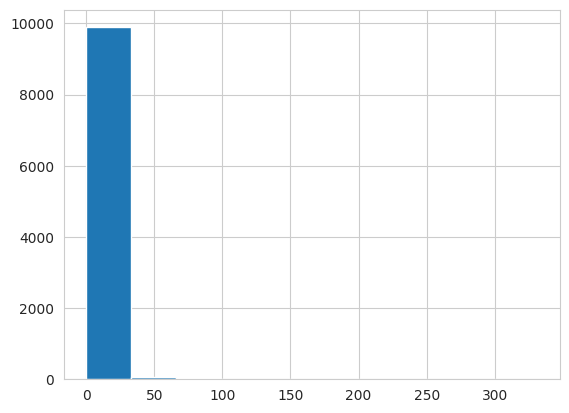

In [35]:
plt.hist(a)

In [32]:
np.sum(a > 0)

197

In [33]:
a[a > 0]

array([ 24,  79,  22,  57, 116,  99, 272,   3,  27,  21,  50,  37,  20,
        44,  11,  18,  61,  85, 100,  39, 129,  21,  10,  36,   1,  61,
        76,  46,   7,   4,  16,   6, 176,  27,   7,  45,  31,  30,  34,
         3,  56,   8,  51,  39,  12, 103,  70,  13,  44,  50,  64,  16,
        83,  54,   4,  60,  25, 149,   2, 138,   1,   4,  27,  15,  64,
         7,  31,   1,  43,   8,  63,  20,   2,  46,  29,  35,  43,  16,
        15,   4,  23,  24, 115,  75,  46,  19,   7,  11, 100,   6,  76,
        15,  49,  23,  34,  80,  98,  18,   7, 118,  84,   8,  29,  13,
         4,  20,  83,  39,  10,  60,   7,  64,  58,  31,   8,  44,  32,
        65,  63,  82, 119,  22,  80,  35, 124, 121,  85, 114,   2,  54,
        21,  29,   2, 122,  68, 105,  37, 132,  18,  62,  98,  28,   3,
        12,  46,  34,  49,  47,  21,  48,  37,  88,  42,   5,   5,  20,
        69,  61, 106,  30, 141,   6, 105, 149,  21,  35, 111,  21,  99,
        51,  85,  83,   7,   4,  23, 119, 331,  39,  29,  37,  2

(array([88., 59., 23., 19.,  5.,  1.,  0.,  0.,  1.,  1.]),
 array([  1.,  34.,  67., 100., 133., 166., 199., 232., 265., 298., 331.]),
 <BarContainer object of 10 artists>)

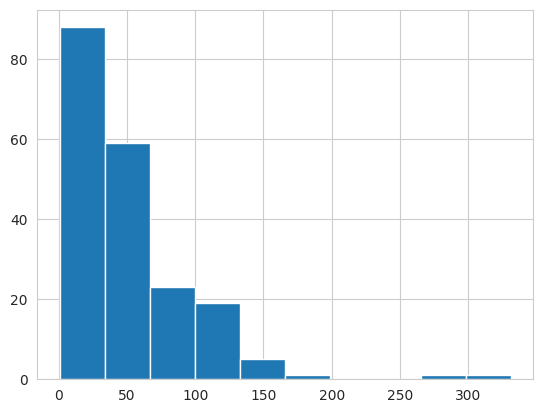

In [34]:
plt.hist(a[a > 0])